In [1]:
import scanpy as sc
import scanpy.external as sce

import anndata
from pathlib import Path
from tqdm import tqdm
import pandas as pd

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/anndata/experimental/pytorch/_annloader.py:18: UserWarning: Сould not load pytorch.
  warnings.warn("Сould not load pytorch.")


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from upsetplot import UpSet
from upsetplot import from_contents

In [3]:
#import relation_data_lake as rdl

In [4]:
from scipy import stats

In [5]:
import scipy.sparse as sp
import anndata as ad

In [6]:
import json

import dask.dataframe as dd
import numpy as np
import pandas as pd
#import relation_data_lake as rdl
import scanpy as sc
import scipy.sparse as sp
from anndata import AnnData
#from relation_data_lake.aws.aws_api import pull_folder

In [7]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400, figsize = [1.5*6.4, 1.5*4.8])
sns.set_style("whitegrid")

In [8]:
n_jobs = 50

sc._settings.ScanpyConfig(
    n_jobs=n_jobs
)

In [9]:
import loompy as lp
import glob
import json
import zlib
import base64

from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize


# Load data and create objects

In [10]:
adata = sc.read_h5ad('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/References/Atlas/Data_For_CIMA/DCM_Cells_Raw.h5ad')

In [11]:
df = pd.read_csv('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/References/Atlas/Data_For_CIMA/RefMergeHarmony_Meta.csv')

/tmp/ipykernel_2627701/1347049417.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/References/Atlas/Data_For_CIMA/RefMergeHarmony_Meta.csv')


In [12]:
df.set_index('Unnamed: 0', inplace=True)

In [13]:
adata.obs = adata.obs.join(df)

In [14]:
adata.obs.Names.unique()

array(['Fibroblasts', nan, 'Epicardium', 'Smooth_Muscle', 'Endothelium',
       'Lymphatic', 'Endocardium', 'Pericytes', 'Myeloid', 'B-Cells',
       'NK/T-Cells', 'Neurons', 'Mast', 'Adipocytes', 'Cardiomyocytes'],
      dtype=object)

In [15]:
adata = adata[adata.obs.Names.isin(['Fibroblasts', 'Epicardium', 'Cardiomyocytes'])]

In [16]:
sc.pp.normalize_total(adata, target_sum=10**4)
sc.pp.log1p(adata)

/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
sc.pp.filter_genes(adata, min_cells=100)
sc.pp.filter_genes(adata, min_counts=1000)
adata

AnnData object with n_obs × n_vars = 22936 × 9528
    obs: 'cell_id', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.03', 'SCT_snn_res.0.04', 'SCT_snn_res.0.05', 'SCT_snn_res.0.06', 'SCT_snn_res.0.07', 'SCT_snn_res.0.08', 'SCT_snn_res.0.09', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'condition', 'id', 'tech', 'percent.mt', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'CondTech', 'pop1_z', 'pop2_z', 'pop3_z', 'pop4_z', 'pop5_z', 'pop6_z', 'pop7_z', 'pop8_z', 'pop9_z', 'pop10_z', 'pop11_z', 'pop12_z', 'pop13_z', 'pop14_z', 'pop15_z', 'Sex', 'Age_Group_Tertile', 'Names', 'nCount_prediction.score.celltype.l1', 'nFeature_prediction.score.celltype.l1', 'nCount_prediction.score.celltype.l2', 'nFeature_predic

In [18]:
rwerete

NameError: name 'rwerete' is not defined

In [19]:
f_tfs = "/home/jupyter-jake/SharedData/collaborations/pyscenic/human/allTFs_hg38.txt" 
f_loom_path_scenic = "/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/References/Atlas/Mouse_Koenig_Fibro.loom"
f_db_glob = "/home/jupyter-jake/SharedData/collaborations/pyscenic/human/*feather"
f_db_names = ' '.join( glob.glob(f_db_glob) )

# motif databases
f_motif_path = "/home/jupyter-jake/SharedData/collaborations/pyscenic/human/motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl"
f_pyscenic_output = "pyscenic_output_Koenig.loom"


In [20]:
# create basic row and column attributes for the loom file:
row_attrs = {
    "Gene": np.array(adata.var_names) ,
}
col_attrs = {
    "CellID": np.array(adata.obs_names) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
}
lp.create( f_loom_path_scenic, adata.X.transpose(), row_attrs, col_attrs)

In [21]:
Stopstoptop

NameError: name 'Stopstoptop' is not defined

In [ ]:
!pyscenic grn {f_loom_path_scenic} {f_tfs} -o adj_Koenig.csv --num_workers 20

In [26]:
!pyscenic ctx adj_Koenig.csv \
    {f_db_names} \
    --annotations_fname {f_motif_path} \
    --expression_mtx_fname {f_loom_path_scenic} \
    --output reg_Koenig.csv \
    --mask_dropouts \
    --num_workers 20


2023-07-19 12:34:02,182 - pyscenic.cli.pyscenic - INFO - Creating modules.

2023-07-19 12:34:02,962 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-07-19 12:34:06,290 - pyscenic.utils - INFO - Calculating Pearson correlations.

2023-07-19 12:34:06,631 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [True].

2023-07-19 12:34:22,631 - pyscenic.utils - INFO - Creating modules.

2023-07-19 12:35:10,878 - pyscenic.cli.pyscenic - IN

In [27]:
!pyscenic aucell \
    {f_loom_path_scenic} \
    reg_Koenig.csv \
    --output {f_pyscenic_output} \
    --num_workers 20


2023-07-19 13:19:23,247 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-07-19 13:19:27,945 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.
Create regulons from a dataframe of enriched features.
Additional columns saved: []

2023-07-19 13:19:29,720 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.

2023-07-19 13:19:45,127 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/opt/tljh/user/envs/jake_sc_eda/lib/python3.10/site-packages/pyscenic/cli/utils.py:347: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [ ]:
sdfsfddfs

In [28]:
# scenic output
lf = lp.connect( f_pyscenic_output, mode='r', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [29]:
auc_mtx

,AHR(+),ARNT(+),ARNTL(+),ATF1(+),ATF2(+),ATF3(+),ATF5(+),ATF6(+),ATF7(+),BACH1(+),...,ZNF561(+),ZNF580(+),ZNF584(+),ZNF595(+),ZNF641(+),ZNF704(+),ZNF76(+),ZNF880(+),ZNF91(+),ZSCAN9(+)
HDCM1_AAACCTGCACTGTCGG-1,0.020168,0.001622,0.0,0.005684,0.0,0.027282,0.000000,0.005355,0.0,0.000000,...,0.0,0.005583,0.0,0.0,0.020588,0.020646,0.0,0.000000,0.000000,0.0
HDCM1_AAAGATGCACCGCTAG-1,0.028939,0.010158,0.0,0.001482,0.0,0.033881,0.000000,0.006715,0.0,0.000000,...,0.0,0.005252,0.0,0.0,0.011261,0.011941,0.0,0.004302,0.039916,0.0
HDCM1_AAAGATGCAGGAATGC-1,0.156408,0.025396,0.0,0.007773,0.0,0.047296,0.000000,0.019867,0.0,0.044223,...,0.0,0.013344,0.0,0.0,0.051849,0.030054,0.0,0.014006,0.033804,0.0
HDCM1_AAAGTAGCATACGCCG-1,0.033088,0.008629,0.0,0.001902,0.0,0.028730,0.000000,0.005015,0.0,0.000000,...,0.0,0.006050,0.0,0.0,0.002941,0.017229,0.0,0.007903,0.030558,0.0
HDCM1_AAAGTAGGTGTAATGA-1,0.049055,0.004215,0.0,0.004844,0.0,0.037088,0.000000,0.007978,0.0,0.000000,...,0.0,0.006847,0.0,0.0,0.000000,0.033416,0.0,0.012555,0.078495,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HDCM8_TTCTACAAGGCCATAG-1,0.053834,0.007486,0.0,0.001447,0.0,0.036585,0.000000,0.005853,0.0,0.000000,...,0.0,0.004727,0.0,0.0,0.007311,0.017579,0.0,0.000000,0.065126,0.0
HDCM8_TTGACTTCAACGATGG-1,0.057511,0.002048,0.0,0.001109,0.0,0.039473,0.013205,0.010516,0.0,0.000000,...,0.0,0.000078,0.0,0.0,0.020084,0.020736,0.0,0.000000,0.095684,0.0
HDCM8_TTGGAACGTAAAGGAG-1,0.068960,0.009108,0.0,0.004867,0.0,0.031219,0.000000,0.013564,0.0,0.000000,...,0.0,0.010601,0.0,0.0,0.011849,0.020384,0.0,0.000000,0.087280,0.0
HDCM8_TTGGCAAGTGACGGTA-1,0.044643,0.005478,0.0,0.000642,0.0,0.030419,0.000000,0.007274,0.0,0.000000,...,0.0,0.007139,0.0,0.0,0.031597,0.015051,0.0,0.000000,0.051948,0.0


In [30]:
asdasdas

NameError: name 'asdasdas' is not defined

In [34]:
rss_cellType = regulon_specificity_scores( auc_mtx, adata.obs.Names )
rss_cellType

,AHR(+),ARNT(+),ARNTL(+),ATF1(+),ATF2(+),ATF3(+),ATF5(+),ATF6(+),ATF7(+),BACH1(+),...,ZNF561(+),ZNF580(+),ZNF584(+),ZNF595(+),ZNF641(+),ZNF704(+),ZNF76(+),ZNF880(+),ZNF91(+),ZSCAN9(+)
Fibroblasts,0.825047,0.773798,0.211143,0.684579,0.232495,0.890253,0.283068,0.812382,0.246085,0.388592,...,0.195657,0.728687,0.181138,0.201435,0.613832,0.862934,0.258250,0.381720,0.528625,0.249381
Epicardium,0.185242,0.188385,0.172376,0.187176,0.175689,0.185460,0.176827,0.191604,0.172569,0.179798,...,0.175173,0.190023,0.173457,0.170506,0.191994,0.187093,0.172533,0.178129,0.170193,0.203935
Cardiomyocytes,0.167752,0.168899,0.167445,0.168269,0.168056,0.168231,0.167445,0.168492,0.173889,0.168003,...,0.167445,0.168436,0.167445,0.172730,0.168001,0.168052,0.168734,0.168588,0.167445,0.167445


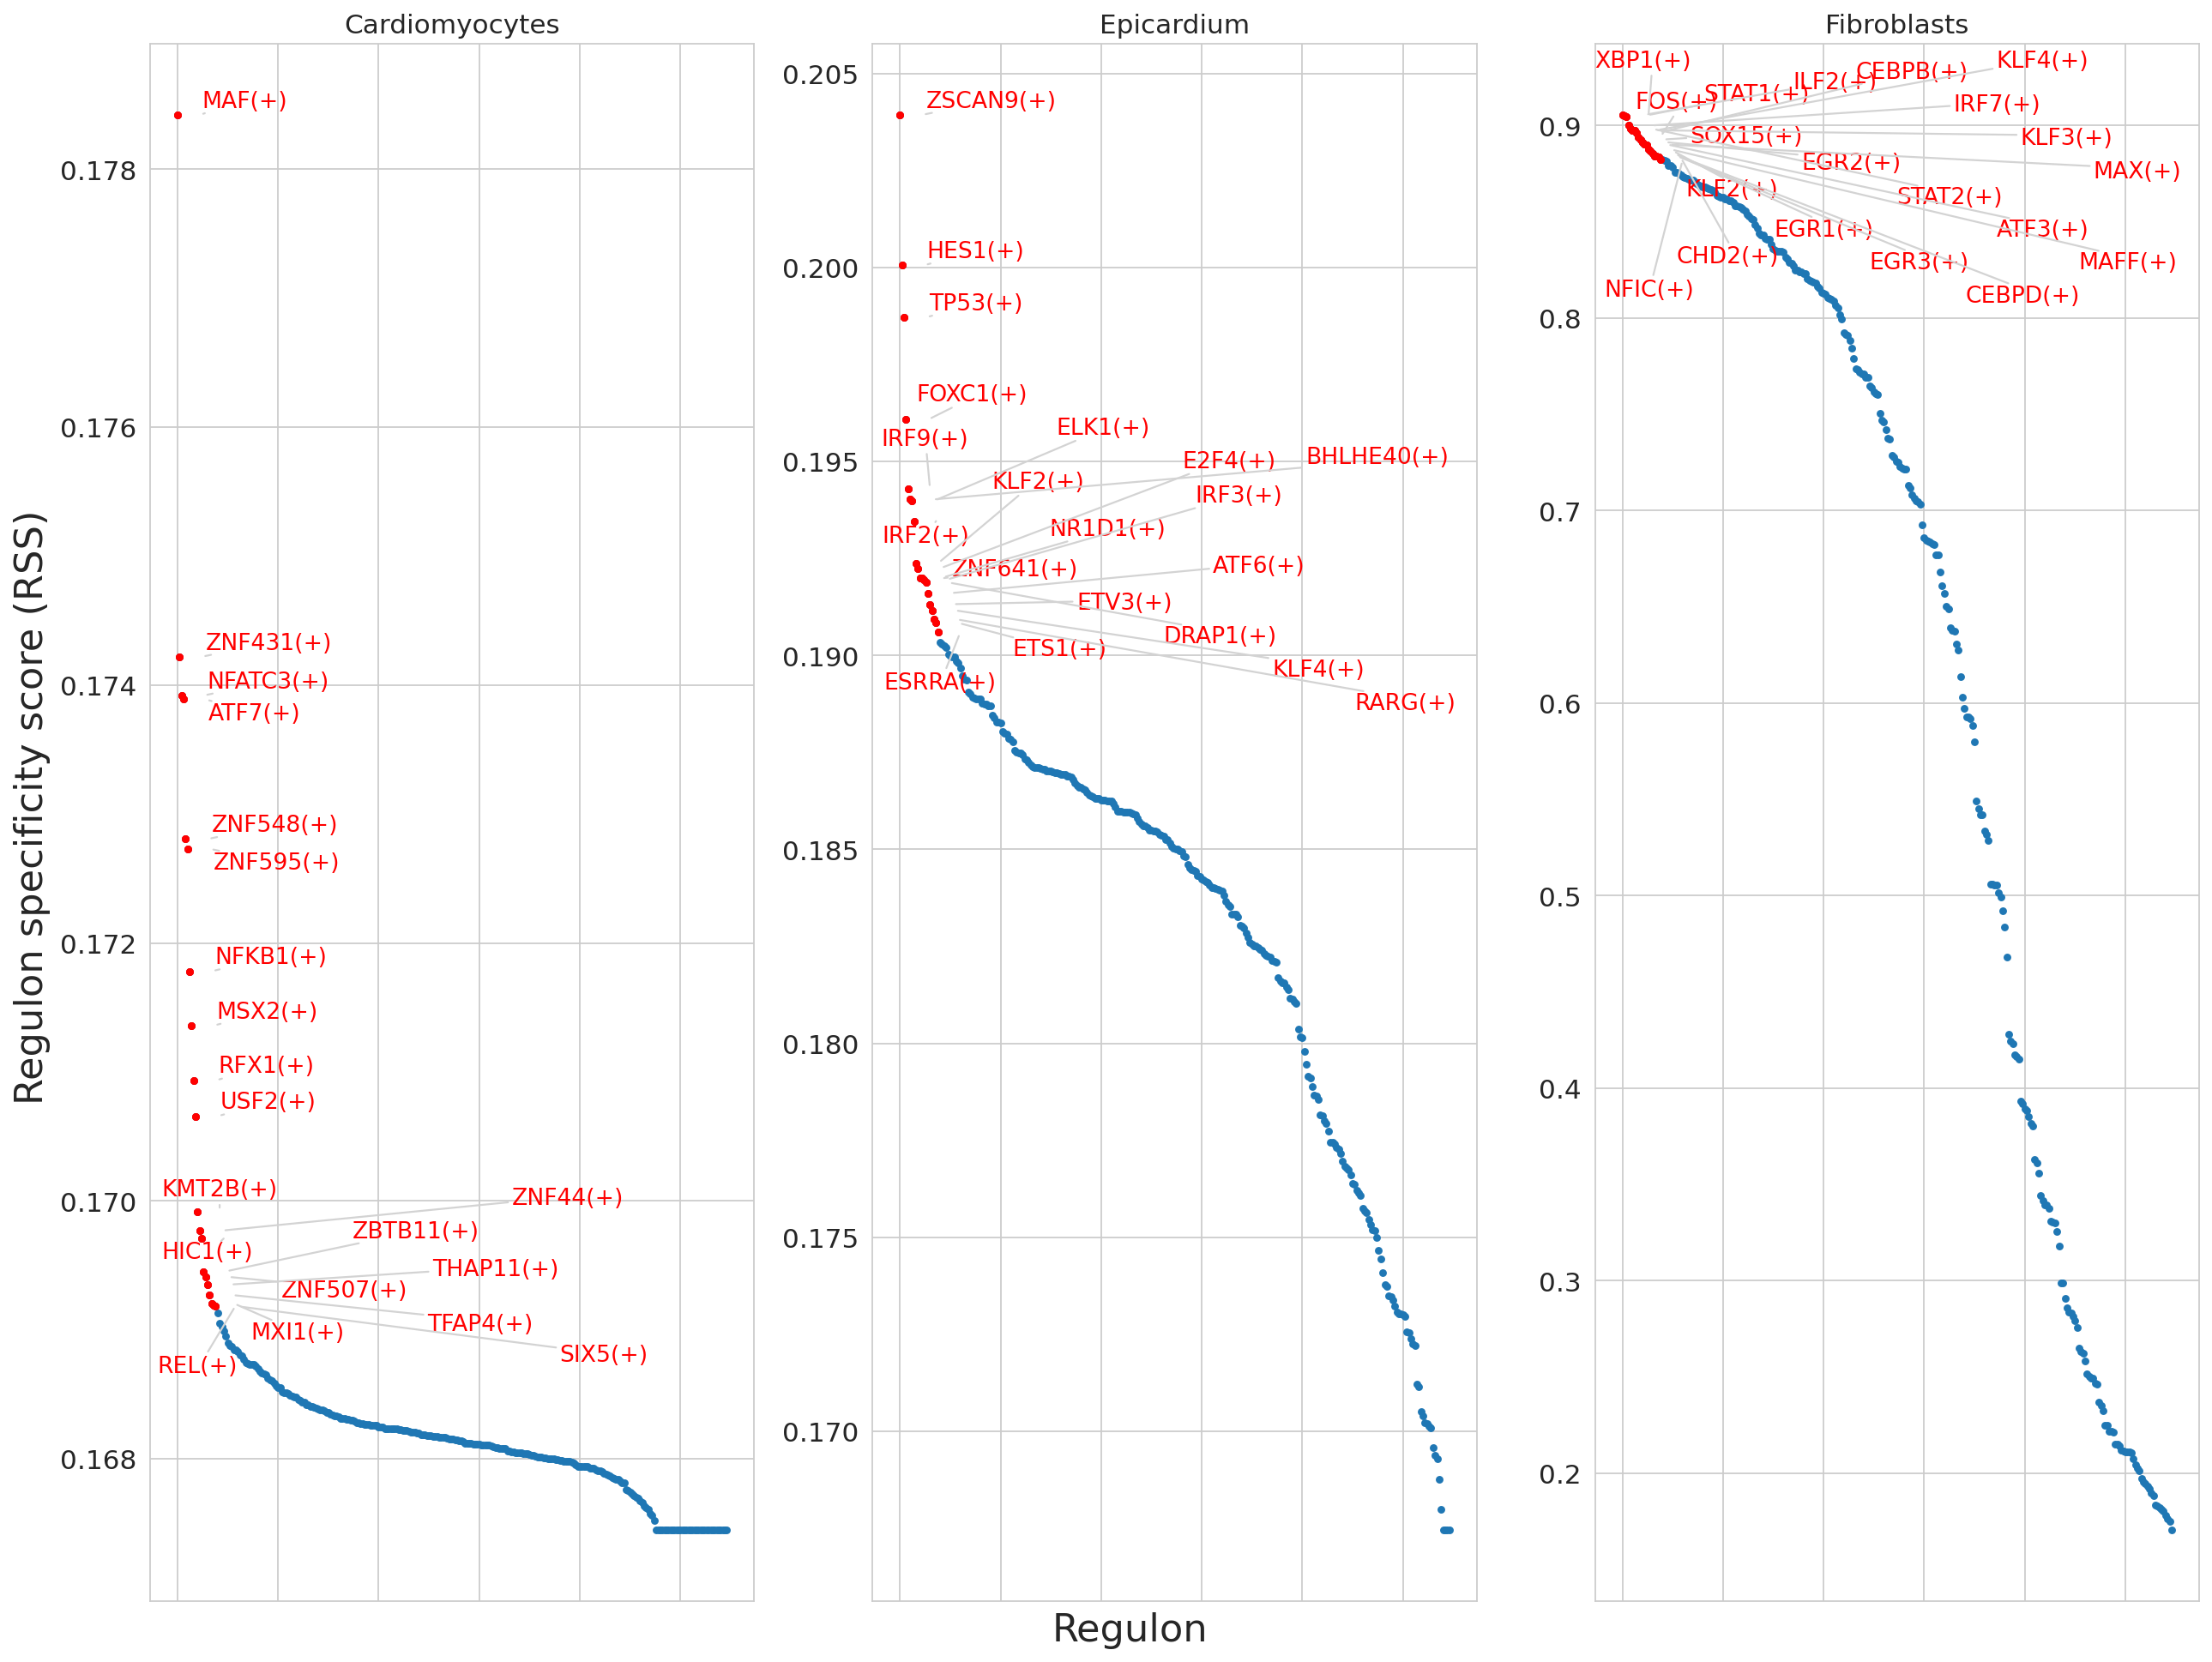

In [36]:
cats = sorted(list(set(adata.obs.Names )))

fig = plt.figure(figsize=(16, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(1,3,num)
    plot_rss(rss_cellType, c, top_n=20, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({'figure.autolayout': True, 'figure.titlesize': 'medium' ,'axes.labelsize': 'medium','axes.titlesize':'medium','xtick.labelsize':'medium','ytick.labelsize':'medium'})
#plt.savefig("figures/Buechler_comparison-RSS-top20.pdf", dpi=600, bbox_inches = "tight")
#plt.savefig("figures/Buechler_comparison-RSS-top20.png", dpi=600, bbox_inches = "tight")
#plt.savefig("figures/Buechler_comparison-RSS-top20.svg", dpi=600, bbox_inches = "tight")

plt.show()

In [ ]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [ ]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [ ]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              #cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [ ]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in adata.obs.cell_type ]

In [ ]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("PBMC10k_cellType-heatmap-legend-top5.pdf", dpi=600, bbox_inches = "tight")

In [ ]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("PBMC10k_cellType-heatmap-top5.pdf", dpi=600, bbox_inches = "tight")